In [18]:
df_Pop_MSW

,Population,Total_MSW
LIC,0.63,0.10
LMC,2.58,0.44
UMC,2.52,0.62
HIC,1.22,0.69


<IPython.core.display.Javascript object>


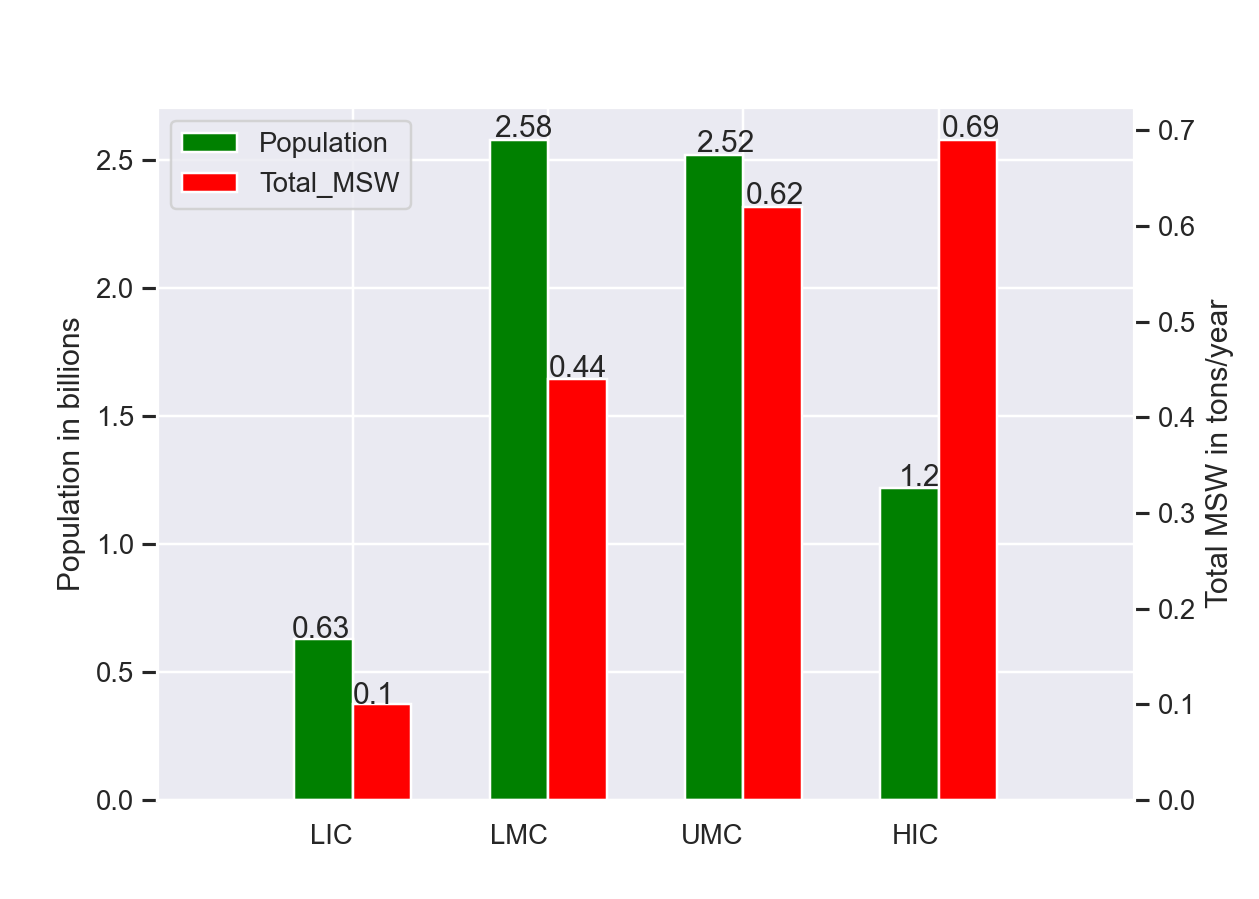

In [10]:
# Import dependencies 
import matplotlib.pyplot as plt 
import numpy as np

sns.set()
fig = plt.figure(figsize=(7,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a

width = .3 # bar widths

# Plot value_counts for each income groups, in the first position
# Plot total population for each income groups, in the second position

df_Pop_MSW.Population.plot(kind='bar',color='green',ax=ax,width=width, position=1) 
df_Pop_MSW.Total_MSW.plot(kind='bar',color='red', ax=ax2,width = width, position=0)


#Annotate the values on each bar for Income and Population for easy understanding
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.035, p.get_height() * 1.005))

for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
 
    
# Legends to show that blue bar is for 'Income' groups and green bars for 'Population'    
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# Grid lines, both y-axis labels, set limits for x-axis, x-axis labels
#ax.grid(None)#(None,axis=1)
ax2.grid(None)

# Both y-axis labels
ax.set_ylabel('Population in billions')
ax2.set_ylabel('Total MSW in tons/year')

# Set limits for x-axis
ax.set_xlim(-1,4)

# x-axis labels, save and show figure
ax.set_xticklabels(ax.get_xticklabels(),rotation=0, ha='right')
#plt.title('Countries Grouped Based On Their Income Vs Their Total Population')
#plt.savefig('Income_population.png')
plt.show()

<IPython.core.display.Javascript object>


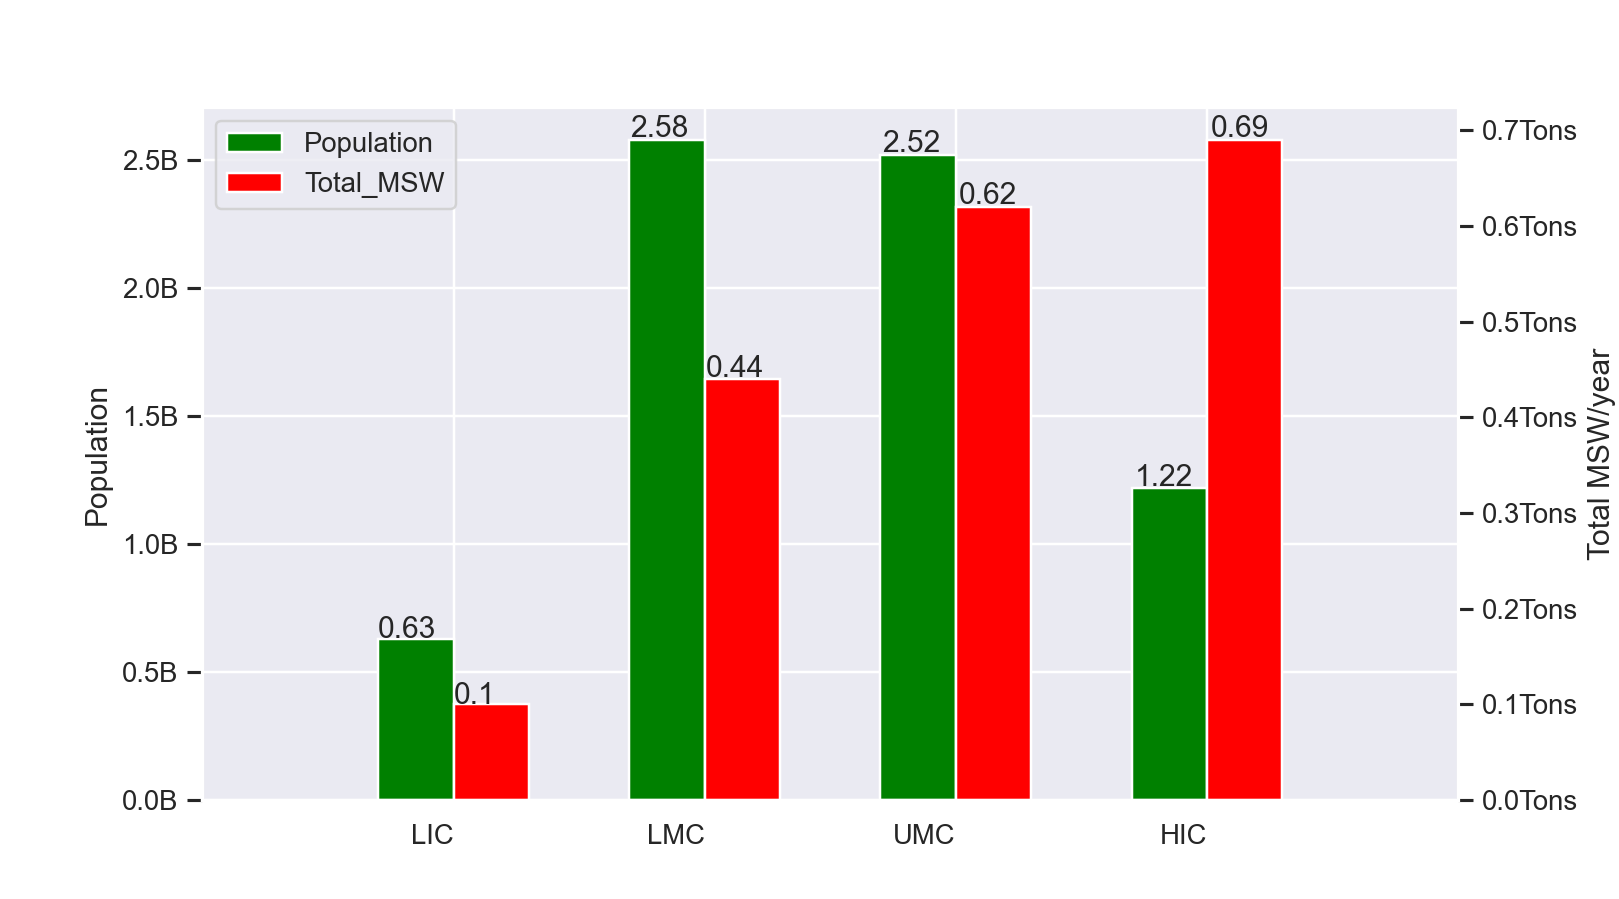

In [11]:
# Import dependencies 
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.ticker as ticker

sns.set()
fig = plt.figure(figsize=(9,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a

width = .3 # bar widths

# Plot value_counts for each income groups, in the first position
# Plot total population for each income groups, in the second position

df_Pop_MSW.Population.plot(kind='bar',color='green',ax=ax,width=width, position=1) 
df_Pop_MSW.Total_MSW.plot(kind='bar',color='red', ax=ax2,width = width, position=0)


#Annotate the values on each bar for Income and Population for easy understanding
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
 
    
# Legends to show that blue bar is for 'Income' groups and green bars for 'Population'    
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# Grid lines, both y-axis labels, set limits for x-axis, x-axis labels
#ax.grid(None)#(None,axis=1)
ax2.grid(None)

# Both y-axis labels
ax.set_ylabel('Population')
ax2.set_ylabel('Total MSW/year')

# Rewrite the y labels
y_labels = ax2.get_yticks()
#ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))

formatter = ticker.FormatStrFormatter('%1.1fB')
ax.yaxis.set_major_formatter(formatter)

formatter = ticker.FormatStrFormatter('%1.1fTons') #'$%1.2f'
ax2.yaxis.set_major_formatter(formatter)

# Set limits for x-axis
ax.set_xlim(-1,4)

# x-axis labels, save and show figure
ax.set_xticklabels(ax.get_xticklabels(),rotation=0, ha='right')
#plt.title('Countries Grouped Based On Their Income Vs Their Total Population')
plt.savefig('Population_TotalMSW.png')
plt.show()

# Counts Vs Population

In [12]:
df_raw = country_data_df[['country_name', 
                       'income_id', 
                       'gdp', 
                       'population_population_number_of_people']]
df_raw.fillna(0).set_index('country_name').drop_duplicates()
df = df_raw.dropna(subset = ['country_name'], axis=0, how='all')
#df = df_nan.dropna(subset = ['total_msw_total_msw_generated_tons_year'], axis=0, how='all')
df.head(3)

,country_name,income_id,gdp,population_population_number_of_people
0,Aruba,HIC,NaN,103187.0
1,Afghanistan,LIC,2.141361e+10,34656032.0
2,Angola,LMC,1.030423e+11,25096150.0


# Count all countries and separate them to the appropriate labels

In [13]:
## Count how many LIC, LMC, UMC and HIC are there in the income_id columns for plotting  

Income_world = country_data_df.income_id.value_counts()
df_income = pd.DataFrame(Income_world)
df_income_T = df_income.T
df_income_T.reset_index()
a = df_income_T[['LIC', 'LMC', 'UMC', 'HIC']]
a

,LIC,LMC,UMC,HIC
income_id,33,47,56,81


# Take the sum of population in each group

In [14]:
## Groupby income_id, get_group LIC, LMC, UMC, HIC and convert to a dataframe 
Pop_LIC = df.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates().set_index('country_name')
df1 = Pop_LIC.sum(axis=0)
df_LIC= pd.DataFrame(df1)

Pop_LMC = df.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates().set_index('country_name')
df1 = Pop_LMC.sum(axis=0)
df_LMC= pd.DataFrame(df1)

Pop_UMC = df.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates().set_index('country_name')
df1 = Pop_UMC.sum(axis=0)
df_UMC= pd.DataFrame(df1)

Pop_HIC = df.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates().set_index('country_name')
df1 = Pop_HIC.sum(axis=0)
df_HIC= pd.DataFrame(df1)
df_HIC


# Concat all dataframes, and rename the columns

df_Pop = pd.concat([df_LIC,df_LMC,df_UMC,df_HIC], axis=1)
df_Pop.columns=["LIC", "LMC", "UMC", "HIC"]
df_Pop.index.names = ['Pop/GDP']
df_world_Pop = df_Pop.drop(['income_id', 'gdp'])
Pop_Income=df_world_Pop.rename(index = {'gdp':'GDP',
                      'population_population_number_of_people': 'Population',
                        'income_id': 'Income'})

# Concat income and population in a dataframe. Convert population to few decimals
Final = pd.concat([a, Pop_Income], axis=0).T
Short_Pop = [0.63, 2.58, 2.52 ,1.22]
Final['Short_Pop'] = Short_Pop
Final_1 = Final.rename(columns = {'income_id': 'Counts',
                      'Population': 'Pop',
                         'Short_Pop': 'Population'})
Final_1.reset_index()


,index,Counts,Pop,Population
0,LIC,33,6.32142e+08,0.63
1,LMC,47,2.58195e+09,2.58
2,UMC,56,2.52651e+09,2.52
3,HIC,81,1.20565e+09,1.22


# Plot grouped chart with primary and secondary y-axis

<IPython.core.display.Javascript object>


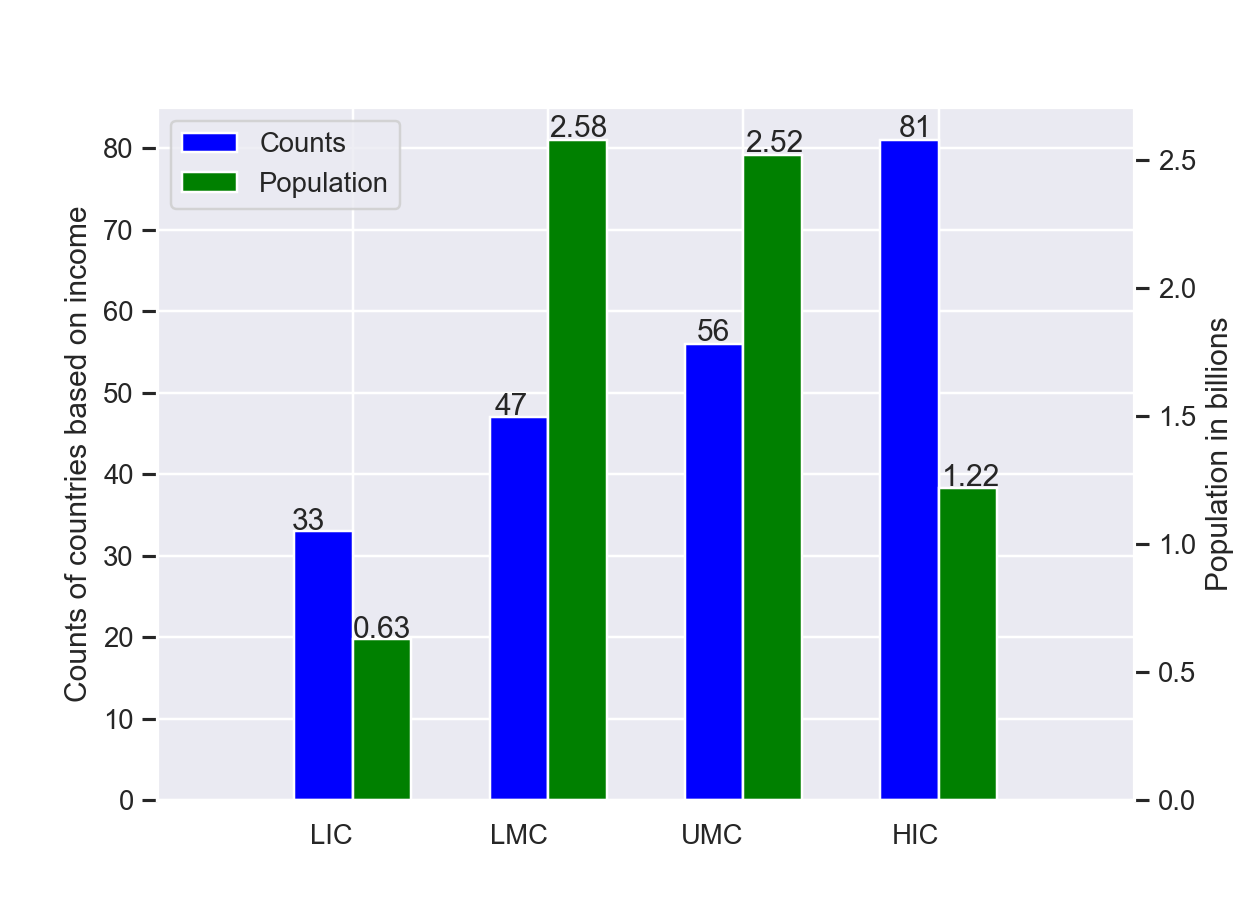

In [15]:
# Import dependencies 
import matplotlib.pyplot as plt 
import numpy as np

sns.set()
fig = plt.figure(figsize=(7,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a

width = .3 # bar widths


# Plot value_counts for each income groups, in the first position
# Plot total population for each income groups, in the second position

Final_1.Counts.plot(kind='bar',color='blue',ax=ax,width=width, position=1) 
Final_1.Population.plot(kind='bar',color='green', ax=ax2,width = width, position=0)


#Annotate the values on each bar for Income and Population for easy understanding
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.035, p.get_height() * 1.005))

for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
 
    
# Legends to show that blue bar is for 'Income' groups and green bars for 'Population'    
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# Grid lines, both y-axis labels, set limits for x-axis, x-axis labels
#ax.grid(None)#(None,axis=1)
ax2.grid(None)

# Both y-axis labels
ax.set_ylabel('Counts of countries based on income')
ax2.set_ylabel('Population in billions')

# Set limits for x-axis
ax.set_xlim(-1,4)

# x-axis labels, save and show figure
ax.set_xticklabels(ax.get_xticklabels(),rotation=0, ha='right')
#plt.title('Countries Grouped Based On Their Income Vs Their Total Population')
#plt.savefig('Income_population.png')
plt.show()

# Subplots

# The End